# Forecasting Cab Booking Demand in a City - Integrating Historical Usage Patterns and Weather Data for Enhanced Accuracy
  

## Task done:
### 1. Import the required libraries and load the training and testing dataset

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_log_error

In [2]:
test_data = pd.read_csv("test.csv")
test_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000
4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994


In [3]:
test_label = pd.read_csv("test_label.csv")
test_label.head()

,Total_booking
0,256
1,87
2,11
3,84
4,668


In [4]:
# Merging 2 dataset of test
test_df = pd.concat([test_data, test_label], axis=1)
test_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,256
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,87
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,11
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,84
4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,668


#### Merging the train & train_label dataset

In [5]:
train_data = pd.read_csv("train.csv")
train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012


In [6]:
train_label = pd.read_csv("train_label.csv")
train_label.head()

,Total_booking
0,504
1,5
2,139
3,209
4,184


In [7]:
# Merging 2 datasets of train
train_df = pd.concat([train_data, train_label], axis=1)
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184


In [8]:
# testing dataset
test_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,256
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,87
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,11
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,84
4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,668


In [9]:
# training dataset
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184


In [10]:
# Concatenate the two datasets along the rows 
carBooking_data = pd.concat([train_df, test_df], axis=0)

# Reset the index of the merged dataset
carBooking_data.reset_index(drop=True, inplace=True)

In [11]:
carBooking_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184


### 2. Analyze the dataset and write your observation
<ul>
    <li> Check the shape of the training and testing set </li>
    <li> Print the data types of each column </li>
    <li> Check the missing values present in the dataset </li>
</ul>

In [12]:
carBooking_data_shape = carBooking_data.shape
print('Car Booking Dataset Shape:', carBooking_data_shape)

Car Booking Dataset Shape: (10886, 10)


In [13]:
# Data types of each column
carBooking_data.dtypes

datetime          object
season            object
holiday            int64
workingday         int64
weather           object
temp             float64
atemp            float64
humidity           int64
windspeed        float64
Total_booking      int64
dtype: object

In [14]:
# Checking the missing values
carBooking_data.isnull().sum()

datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
Total_booking    0
dtype: int64

### 3. Perform Feature Engineering:
<ul>
    <li>Create new columns date, hour, weekDay, month from datetime column</li>
    <li>Coerce the datatype of season, holiday, workingday, and weather to category</li>
    <li>Drop the datetime column as we have already extracted useful features from it</li>
</ul>

In [15]:
# Creating new columns from datetime as date, hour, weekDay, and weather in training dataset
# Converting the datetime column to pandas datetime format
carBooking_data['datetime'] = pd.to_datetime(carBooking_data['datetime'])

# Creating new columns for date, hour, weekday, and month
carBooking_data['date'] = carBooking_data['datetime'].dt.date
carBooking_data['hour'] = carBooking_data['datetime'].dt.hour
carBooking_data['weekDay'] = carBooking_data['datetime'].dt.weekday
carBooking_data['month'] = carBooking_data['datetime'].dt.month

carBooking_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,date,hour,weekDay,month
0,2012-05-02 19:00:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,2012-05-02,19,2,5
1,2012-09-05 04:00:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,2012-09-05,4,2,9
2,2011-01-13 09:00:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,2011-01-13,9,3,1
3,2011-11-18 16:00:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,2011-11-18,16,4,11
4,2011-09-13 13:00:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,2011-09-13,13,1,9


In [16]:
# Coerce the training data type of columns to category
carBooking_data['season'] = carBooking_data['season'].astype('category')
carBooking_data['holiday'] = carBooking_data['holiday'].astype('category')
carBooking_data['workingday'] = carBooking_data['workingday'].astype('category')
carBooking_data['weather'] = carBooking_data['weather'].astype('category')

# Print the updated DataFrame
carBooking_data.dtypes

datetime         datetime64[ns]
season                 category
holiday                category
workingday             category
weather                category
temp                    float64
atemp                   float64
humidity                  int64
windspeed               float64
Total_booking             int64
date                     object
hour                      int64
weekDay                   int64
month                     int64
dtype: object

In [17]:
# Drop the 'datetime' column from training dataset
carBooking_data = carBooking_data.drop('datetime', axis=1)
carBooking_data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,date,hour,weekDay,month
0,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,2012-05-02,19,2,5
1,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,2012-09-05,4,2,9
2,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,2011-01-13,9,3,1
3,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,2011-11-18,16,4,11
4,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,2011-09-13,13,1,9


### 4. Perform Outlier Analysis:
<ul>
    <li>Plot Box plots across various features like season, hour of the day, working_day, etc to see if there are any Outlier and note down your inference</li>
    <li>Remove the outliers present in the dataset</li>
</ul>

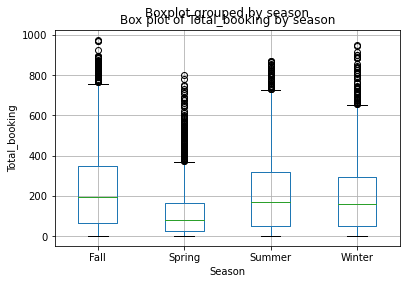

In [18]:
carBooking_data.boxplot(column='Total_booking', by='season')
plt.title("Box plot of Total_booking by season")
plt.ylabel("Total_booking")
plt.xlabel("Season")
plt.show()

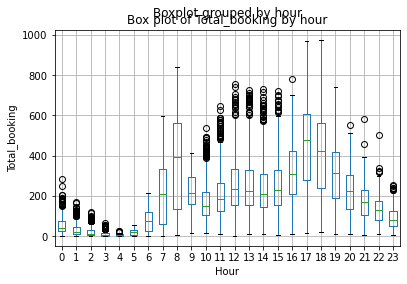

In [19]:
carBooking_data.boxplot(column='Total_booking', by='hour')
plt.title("Box plot of Total_booking by hour")
plt.ylabel("Total_booking")
plt.xlabel("Hour")
plt.show()

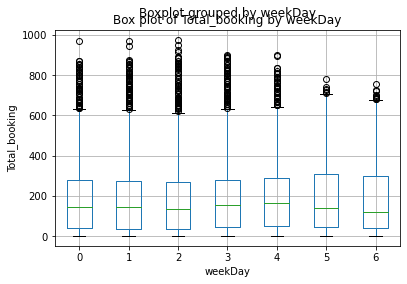

In [20]:
carBooking_data.boxplot(column='Total_booking', by='weekDay')
plt.title("Box plot of Total_booking by weekDay")
plt.ylabel("Total_booking")
plt.xlabel("weekDay")
plt.show()

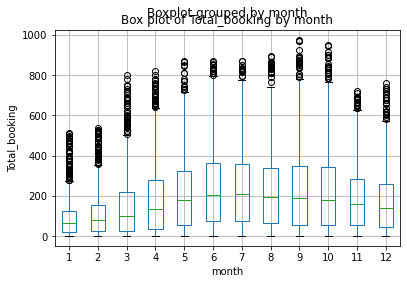

In [21]:
carBooking_data.boxplot(column='Total_booking', by='month')
plt.title("Box plot of Total_booking by month")
plt.ylabel("Total_booking")
plt.xlabel("month")
plt.show()

In [22]:
# Identify outliers
outliers = []
for feature in ['season', 'hour', 'workingday']:
    Q1 = carBooking_data.groupby(feature)['Total_booking'].quantile(0.25)
    Q3 = carBooking_data.groupby(feature)['Total_booking'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers.extend(carBooking_data[(carBooking_data[feature] == val) & ((carBooking_data['Total_booking'] < lower_bound[val]) | (carBooking_data['Total_booking'] > upper_bound[val]))].index.tolist() for val in carBooking_data[feature].unique())

# Flatten the list of outliers
outliers = [index for sublist in outliers for index in sublist]

# Remove outliers from the dataset
carBooking_data_cleaned = carBooking_data.drop(outliers)

carBooking_data_cleaned.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,date,hour,weekDay,month
0,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,2012-05-02,19,2,5
1,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,2012-09-05,4,2,9
2,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,2011-01-13,9,3,1
3,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,2011-11-18,16,4,11
4,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,2011-09-13,13,1,9


### 5. Perform Correlation Analysis:
<ul>
    <li>Plot a correlation plot between "total booking" and ["temp", "atemp", "humidity", "windspeed"]</li>
    <li>Write down your inference in the markdown cell</li>
</ul>

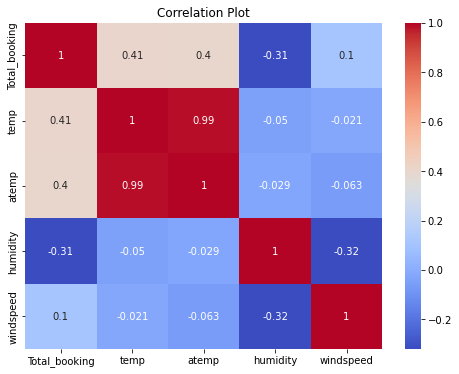

In [23]:
# Select the columns for correlation plot
columns = ["Total_booking", "temp", "atemp", "humidity", "windspeed"]
subset_data = carBooking_data_cleaned[columns]

# Compute the correlation matrix
correlation_matrix = subset_data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Plot")
plt.show()

<ul>
    <li>"Total_booking" has a strong positive correlation with both "temp" (0.41) and "atemp" (0.4). This indicates that as temperature (both actual and apparent) increases, there is a tendency for the total number of bookings to increase as well. In other words, warmer weather is associated with higher booking activity.</li>
    <li>"Total_booking" has a negative correlation with "humidity" (-0.3). This suggests that as humidity levels increase, there is a tendency for the total number of bookings to decrease. High humidity is associated with lower booking activity.</li>
    <li>"Total_booking" has a weak positive correlation with "windspeed" (0.1). This implies that as windspeed increases, there is a slight tendency for the total number of bookings to increase. However, the correlation is not very strong.</li>
    <li>"temp" and "atemp" have a very strong positive correlation (approximately 0.99). This is expected since "atemp" represents the apparent temperature, which is typically highly correlated with the actual temperature ("temp").</li>
    <li>"temp" and "atemp" have a weak negative correlation with "humidity" (-0.05 and -0.029, respectively), indicating that as temperature increases, humidity tends to decrease slightly.</li>
    <li>"humidity" has a negative correlation with "windspeed" (-0.32). This suggests that as humidity levels increase, windspeed tends to decrease.</li>
</ul>

### 6. Perform Data Visualization
<ul>
    <li>Visualize distribution of data: total_booking column and plot the probability distribution plot for the column as well</li>
    <li>Visualize total_booking vs (Month, Season, Hour, Weekday)</li>
    <li>Use Histograms to plot all the continuous variables present in the data</li>
</ul>

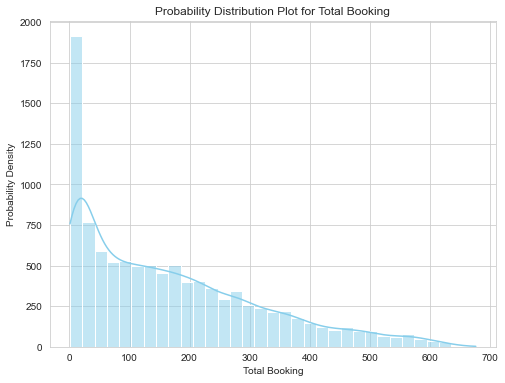

In [24]:
# Selecting the Total_booking column from train_df_cleaned
total_booking_data = carBooking_data_cleaned['Total_booking']

# Set the style for the plot
sns.set_style("whitegrid")

# Creating a probability distribution plot
plt.figure(figsize=(8, 6))
sns.histplot(total_booking_data, kde=True, color='skyblue')
plt.title("Probability Distribution Plot for Total Booking")
plt.xlabel("Total Booking")
plt.ylabel("Probability Density")
plt.show()

### Total_booking vs Month

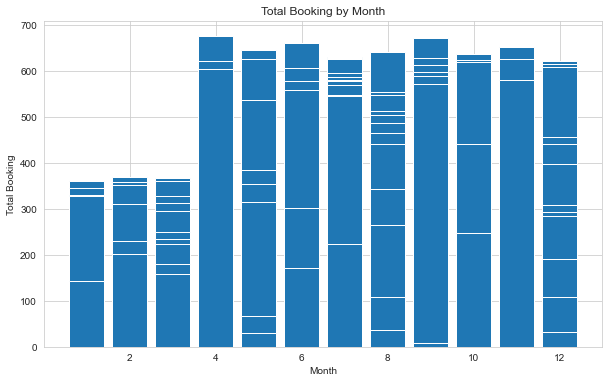

In [25]:
months = carBooking_data_cleaned['month']
total_bookings = carBooking_data_cleaned['Total_booking']

# Creating a bar plot for Total_booking vs Month
plt.figure(figsize=(10, 6))
plt.bar(months, total_bookings)
plt.title("Total Booking by Month")
plt.xlabel("Month")
plt.ylabel("Total Booking")
plt.show()

###  Total_booking vs Season

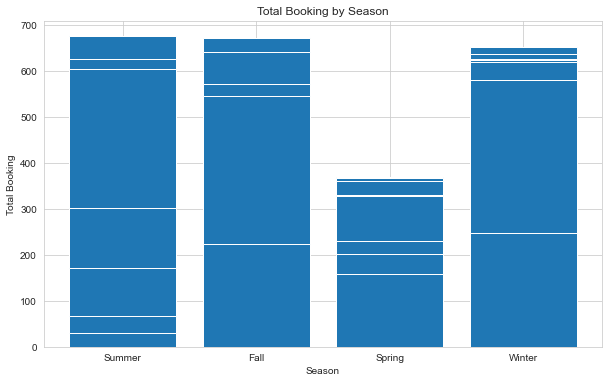

In [26]:
season = carBooking_data_cleaned['season']
total_bookings = carBooking_data_cleaned['Total_booking']

# Creating a bar plot for Total_booking vs Month
plt.figure(figsize=(10, 6))
plt.bar(season, total_bookings)
plt.title("Total Booking by Season")
plt.xlabel("Season")
plt.ylabel("Total Booking")
plt.show()

### Total_booking vs Hour

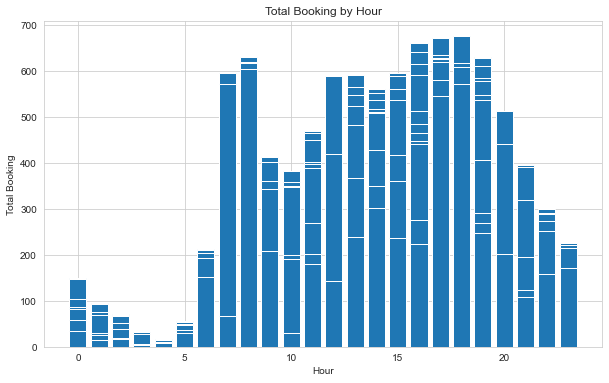

In [27]:
hour = carBooking_data_cleaned['hour']
total_bookings = carBooking_data_cleaned['Total_booking']

# Creating a bar plot for Total_booking vs Month
plt.figure(figsize=(10, 6))
plt.bar(hour, total_bookings)
plt.title("Total Booking by Hour")
plt.xlabel("Hour")
plt.ylabel("Total Booking")
plt.show()

### Total_booking vs Weekday

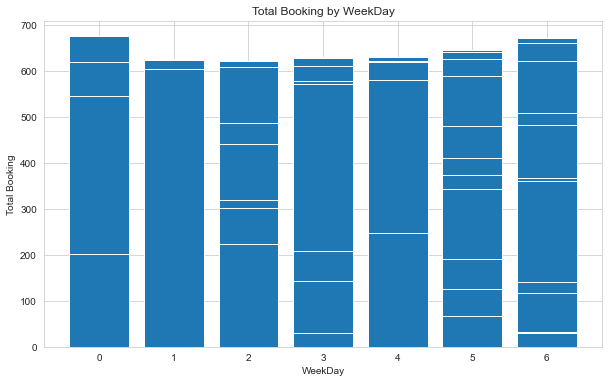

In [28]:
weekday = carBooking_data_cleaned['weekDay']
total_bookings = carBooking_data_cleaned['Total_booking']

# Creating a bar plot for Total_booking vs Month
plt.figure(figsize=(10, 6))
plt.bar(weekday, total_bookings)
plt.title("Total Booking by WeekDay")
plt.xlabel("WeekDay")
plt.ylabel("Total Booking")
plt.show()

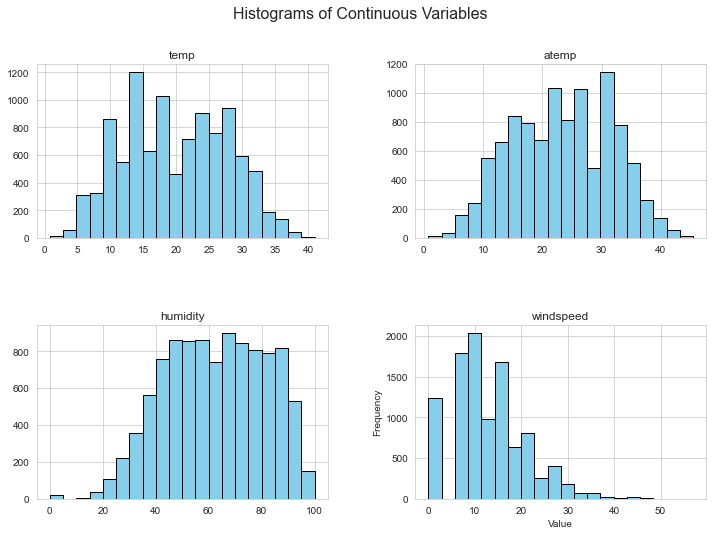

In [29]:
continuous_vars = ['temp', 'atemp', 'humidity', 'windspeed']

# Ploting histograms for continuous variables
carBooking_data_cleaned[continuous_vars].hist(bins=20, figsize=(12, 8), color='skyblue', edgecolor='black')

# Set titles and labels
plt.suptitle("Histograms of Continuous Variables", fontsize=16)
plt.subplots_adjust(hspace=0.5)
plt.xlabel("Value")
plt.ylabel("Frequency")

# Show the plot
plt.show()

### 7. Convert the categorical variables into one hot vector

In [30]:
carBooking_data_cleaned.dtypes

season           category
holiday          category
workingday       category
weather          category
temp              float64
atemp             float64
humidity            int64
windspeed         float64
Total_booking       int64
date               object
hour                int64
weekDay             int64
month               int64
dtype: object

In [31]:
carBooking_df = pd.get_dummies(carBooking_data_cleaned, columns=['season', 'holiday', 'workingday', 'weather'], prefix=['season', 'holiday', 'workingday', 'weather'])

In [32]:
carBooking_df.dtypes

temp                                   float64
atemp                                  float64
humidity                                 int64
windspeed                              float64
Total_booking                            int64
date                                    object
hour                                     int64
weekDay                                  int64
month                                    int64
season_Fall                              uint8
season_Spring                            uint8
season_Summer                            uint8
season_Winter                            uint8
holiday_0                                uint8
holiday_1                                uint8
workingday_0                             uint8
workingday_1                             uint8
weather_ Clear + Few clouds              uint8
weather_ Heavy Rain + Thunderstorm       uint8
weather_ Light Snow, Light Rain          uint8
weather_ Mist + Cloudy                   uint8
dtype: object

In [33]:
carBooking_data_cleaned.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,date,hour,weekDay,month
0,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,2012-05-02,19,2,5
1,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,2012-09-05,4,2,9
2,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,2011-01-13,9,3,1
3,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,2011-11-18,16,4,11
4,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,2011-09-13,13,1,9


In [34]:
carBooking_df.head()

,temp,atemp,humidity,windspeed,Total_booking,date,hour,weekDay,month,season_Fall,...,season_Summer,season_Winter,holiday_0,holiday_1,workingday_0,workingday_1,weather_ Clear + Few clouds,weather_ Heavy Rain + Thunderstorm,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy
0,22.14,25.760,77,16.9979,504,2012-05-02,19,2,5,0,...,1,0,1,0,0,1,1,0,0,0
1,28.70,33.335,79,19.0012,5,2012-09-05,4,2,9,1,...,0,0,1,0,0,1,1,0,0,0
2,5.74,6.060,50,22.0028,139,2011-01-13,9,3,1,0,...,0,0,1,0,0,1,1,0,0,0
3,13.94,16.665,29,8.9981,209,2011-11-18,16,4,11,0,...,0,1,1,0,0,1,1,0,0,0
4,30.34,33.335,51,19.0012,184,2011-09-13,13,1,9,1,...,0,0,1,0,0,1,1,0,0,0


### 8. Split your dataset for training and testing

In [40]:
# carBooking_df is the dataset and 'Total_booking' is the target variable
X = carBooking_df.drop(columns=['Total_booking', 'date']) # Features (excluding the target)
y = carBooking_df['Total_booking'] # Target variable

# Split the dataset into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# X_train and y_train contain the training data and labels.
# X_test and y_test contain the testing data and labels.

### 9. Fit various model (Random Forest Regressor, Ada Boost Regressor, Bagging Regressor, SVR, and K-Neighbours Regressor)


#### Random Forest Regressor

In [77]:
# Initialize the Random Forest Regressor with desired hyperparameters
rf_regressor = RandomForestRegressor(random_state=42)

# Fit the model to the training data
rf_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_regressor.predict(X_test)

# Calculate Mean Squared Error (MSE) to evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
rmse_rf = np.sqrt(mse)

print(f"Root Mean Squared Error (RMSE): {rmse_rf}")

Root Mean Squared Error (RMSE): 52.95139621601137


#### Ada Boost Regressor

In [78]:
# Intialize the AdaBoost Regressor with a base estimator (using DecisionTreeRegressor as base estimator)
base_estimator = DecisionTreeRegressor(max_depth=4)
ada_regressor = AdaBoostRegressor(estimator=base_estimator, random_state=42)

# Fit the model to the training data
ada_regressor.fit(X_train, y_train)

# Make prediction on the test data
y_pred = ada_regressor.predict(X_test)

# Calculate Mean Squared Error (MSE) to evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
rmse_adaboost = np.sqrt(mse)

print(f"Root Mean Squared Error (RMSE): {rmse_adaboost}")

Root Mean Squared Error (RMSE): 85.2367724730793


#### Bagging Regressor

In [80]:
# Intialize the Bagging Regressor with a base estimator (using DecisionTreeRegressor as base estimator)
bagging_regressor = BaggingRegressor(estimator=base_estimator, random_state=42)

# Fit the model to the training data
bagging_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = bagging_regressor.predict(X_test)

# Calculate Mean Squared Error (MSE) to evaluate the model's performance 
mse = mean_squared_error(y_test, y_pred)
rmse_bagging = np.sqrt(mse)

print(f"Root Mean Squared Error (RMSE): {rmse_bagging}")

Root Mean Squared Error (RMSE): 91.87187805998141


#### Support Vector Regressor (SVR)

In [81]:
# Initialize the SVR model
svr_regressor = SVR()

#Fit the model to the training data
svr_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svr_regressor.predict(X_test)

# Calculate Mean Squared Error (MSE) to evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
rmse_svr = np.sqrt(mse)

print(f"Root Mean Squared Error (RMSE): {rmse_svr}")

Root Mean Squared Error (RMSE): 120.07760524150763


#### K-Nearest Neighbors (K-NN) Regressor

In [75]:
# Intialize the  K-NN Regressor with the desired number of neighbors (K)
k = 5 # This value can be adjusted
knn_regressor = KNeighborsRegressor(n_neighbors=k)

# Fit the model to the training data
knn_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_regressor.predict(X_test)

# Calculate Mean Squared Error (MSE) to evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
rmse_knn = np.sqrt(mse)

print(f"Root Mean Squared Error (RMSE): {rmse_knn}")

AttributeError: 'NoneType' object has no attribute 'split'

### 10. Display a Factor plot to visualize the RMSE values achieved by different modeling algorithm

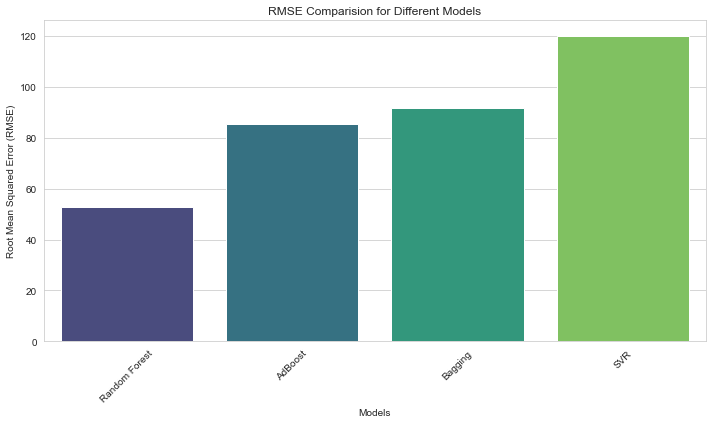

In [85]:
# Defining the models or scenarios and their corresponding RMSE values
models = ['Random Forest', 'AdBoost', 'Bagging', 'SVR']
rmse_values = [rmse_rf, rmse_adaboost, rmse_bagging, rmse_svr]

# Creating a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=rmse_values, palette='viridis')
plt.title('RMSE Comparision for Different Models')
plt.xlabel('Models')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

### 11. Perform Hyper-parameter tuning on the best model using GridSearchCV and print the best parameters using model.best_params_

In [96]:
# Defining the hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Creating the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid,
                          scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Printing the best hyperparameters
print('Best Hyperparameters:', grid_search.best_params_)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


### 12. Perform prediction on the test set and print the mean_squared_log_error

In [97]:
# Getting the best hyperparameters form the grid search
best_params = grid_search.best_params_

# Creating a Random Forest Regressor with the hyperparameters
rf_regressor = RandomForestRegressor(random_state=42, **best_params)

# Fit the model to the training data
rf_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred_test = rf_regressor.predict(X_test)

# Calculate Mean Squared Error (MSE) or any other desired metric
mse = mean_squared_error(y_test, y_pred_test)
msle = mean_squared_log_error(y_test, y_pred_test)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Squared Log Error (MSLE): {msle}")

Mean Squared Error (MSE): 2808.9924546362195
Mean Squared Log Error (MSLE): 0.17153384489485596
